---
# Hierarchical Clustering - Model 2
---
In this notebook, ...


## Results

---

### Importing necessary library

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets, cluster

### Read data file

**Read Cleaned + Feature Engineered File**

In [3]:
df = pd.read_excel('../data/AGRIBALYSE3.2_Synthese_cleaned_featEng.xlsx')
df

,Season Code,Airplane Code,EF Score,Ozone Layer Depletion,Ionizing Radiation,Photochemical Ozone Formation,Fine Particles,Toxicological Effects (Non-carcinogenic),Toxicological Effects (Carcinogenic),Terrestrial and Freshwater Acidification,Freshwater Eutrophication,Marine Eutrophication,Terrestrial Eutrophication,Ecotoxicity for Freshwater Aquatic Ecosystems,Land Use,Water Resource Depletion,Energy Resource Depletion,Mineral Resource Depletion,Climate Change - Biogenic Emissions,Climate Change - Fossil Emissions,Climate Change - Emissions from Land Use Change,Food Sub-group_algues,Food Sub-group_autres matières grasses,Food Sub-group_autres produits à base de viande,Food Sub-group_beurres,Food Sub-group_boisson alcoolisées,Food Sub-group_boissons sans alcool,Food Sub-group_charcuteries,Food Sub-group_chocolats et produits à base de chocolat,Food Sub-group_condiments,Food Sub-group_confiseries non chocolatées,Food Sub-group_confitures et assimilés,Food Sub-group_crèmes et spécialités à base de crème,Food Sub-group_céréales de petit-déjeuner et biscuits,Food Sub-group_céréales et biscuits infantiles,Food Sub-group_denrées destinées à une alimentation particulière,Food Sub-group_desserts glacés,Food Sub-group_desserts infantiles,Food Sub-group_eaux,Food Sub-group_farines et pâtes à tarte,...,Food Sub-group_laits et boissons infantiles,Food Sub-group_légumes,Food Sub-group_légumineuses,Food Sub-group_margarines,Food Sub-group_mollusques et crustacés crus,Food Sub-group_mollusques et crustacés cuits,Food Sub-group_pains et viennoiseries,Food Sub-group_petits pots salés et plats infantiles,"Food Sub-group_pizzas, tartes et crêpes salées",Food Sub-group_plats composés,Food Sub-group_plats végétariens,Food Sub-group_poissons crus,Food Sub-group_poissons cuits,Food Sub-group_pommes de terre et autres tubercules,Food Sub-group_produits laitiers frais et assimilés,Food Sub-group_produits à base de poissons et produits de la mer,"Food Sub-group_pâtes, riz et céréales",Food Sub-group_salades composées et crudités,Food Sub-group_sandwichs,Food Sub-group_sauces,Food Sub-group_sels,Food Sub-group_sorbets,Food Sub-group_soupes,Food Sub-group_substituts de charcuterie,Food Sub-group_substituts de viande,"Food Sub-group_sucres, miels et assimilés",Food Sub-group_viandes crues,Food Sub-group_viandes cuites,Food Sub-group_épices,Food Sub-group_œufs,Delivery_Ambiant (long),Delivery_Ambiant (moyen),Delivery_Congelé,Delivery_Glacé,Packaging_PACK PROXY,Preparation_Four,Preparation_Micro-onde,Preparation_Pas de préparation,Preparation_Poêle,Preparation_Réfrigéré chez le consommateur
0,2,0,1.874152,2.932471e-07,30.251469,0.025011,4.738923e-07,2.087261e-07,6.622400e-09,0.045589,0.001611,0.026783,0.137099,70.183757,106.309500,3.380742,700.159580,0.000051,0.103694,7.459628,0.021197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,2,0,0.148315,2.703735e-08,0.558035,0.003928,7.864125e-08,4.238290e-08,8.815249e-10,0.008049,0.000193,0.004162,0.030263,11.027442,67.673943,2.468103,24.405351,0.000006,0.033626,1.015114,-0.108325,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,2,0,0.147701,3.382798e-08,0.545093,0.004025,6.420649e-08,2.658238e-08,2.141891e-09,0.006324,0.000357,0.007233,0.024434,30.835753,116.492280,0.422468,22.429809,0.000004,0.025180,0.964544,0.184348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,2,0,1.547348,6.270593e-07,11.185511,0.051406,8.615935e-07,9.852629e-08,6.933245e-09,0.110581,0.002146,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,2,0,1.547348,6.270593e-07,11.185511,0.051406,8.615935e-07,9.852629e-08,6.933245e-09,0.110581,0.002146,0.015034,0.

**Read Cleaned File**

In [4]:
df_o = pd.read_excel('../data/AGRIBALYSE3.2_Synthese_cleaned.xlsx')
df_o

,Food Group,Food Sub-group,LCI Name,Season Code,Airplane Code,Delivery,Packaging,Preparation,EF Score,Ozone Layer Depletion,Ionizing Radiation,Photochemical Ozone Formation,Fine Particles,Toxicological Effects (Non-carcinogenic),Toxicological Effects (Carcinogenic),Terrestrial and Freshwater Acidification,Freshwater Eutrophication,Marine Eutrophication,Terrestrial Eutrophication,Ecotoxicity for Freshwater Aquatic Ecosystems,Land Use,Water Resource Depletion,Energy Resource Depletion,Mineral Resource Depletion,Climate Change - Biogenic Emissions,Climate Change - Fossil Emissions,Climate Change - Emissions from Land Use Change
0,aides culinaires et ingrédients divers,aides culinaires,"Aromatic stock cube, for fish, dehydrated",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.874152,2.932471e-07,30.251469,0.025011,4.738923e-07,2.087261e-07,6.622400e-09,0.045589,0.001611,0.026783,0.137099,70.183757,106.309500,3.380742,700.159580,0.000051,0.103694,7.459628,0.021197
1,aides culinaires et ingrédients divers,aides culinaires,Topping sauce for pizza,2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.148315,2.703735e-08,0.558035,0.003928,7.864125e-08,4.238290e-08,8.815249e-10,0.008049,0.000193,0.004162,0.030263,11.027442,67.673943,2.468103,24.405351,0.000006,0.033626,1.015114,-0.108325
2,aides culinaires et ingrédients divers,aides culinaires,"Soy ""cream"" preparation",2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.147701,3.382798e-08,0.545093,0.004025,6.420649e-08,2.658238e-08,2.141891e-09,0.006324,0.000357,0.007233,0.024434,30.835753,116.492280,0.422468,22.429809,0.000004,0.025180,0.964544,0.184348
3,aides culinaires et ingrédients divers,algues,"Seaweed, agar, raw",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,6.270593e-07,11.185511,0.051406,8.615935e-07,9.852629e-08,6.933245e-09,0.110581,0.002146,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545
4,aides culinaires et ingrédients divers,algues,"Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,6.270593e-07,11.185511,0.051406,8.615935e-07,9.852629e-08,6.933245e-09,0.110581,0.002146,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,"viandes, œufs, poissons",viandes cuites,"Veal, knuckle or shank, braised or boiled",2,0,Glacé,PACK AGB,Cuisson à l'eau,2.744841,3.465597e-07,2.183183,0.052400,2.364050e-06,3.273358e-07,1.520520e-08,0.337696,0.002079,0.091173,1.457487,391.691640,1336.417000,4.021206,149.244380,0.000057,15.861507,11.205989,2.617929
2447,"viandes, œufs, poissons",viandes cuites,"Veal, tenderloin, grilled/pan-fried",2,0,Glacé,PACK AGB,Poêle,2.719832,3.360531e-07,1.988039,0.051666,2.357969e-06,3.246593e-07,1.515039e-08,0.337371,0.002055,0.091187,1.457302,392.319170,1339.161800,3.972692,141.891310,0.000056,15.821821,10.946006,2.621672
2448,"viandes, œufs, poissons",viandes cuites,"Veal, tenderloin, roasted",2,0,Glacé,PACK AGB,Four,2.738488,3.342279e-07,2.401715,0.051710,2.361347e-06,3.275382e-07,1.515673e-08,0.337658,0.002072,0.091077,1.457291,392.244620,1336.137200,3.991295,149.677240,0.000059,15.821740,10.910768,2.617884
2449,"viandes, œufs, poissons",viandes cuites,"Veal, roast, cooked",2,0,Glacé,PACK AGB,Four,3.418940,4.171038e-07,2.867791,0.064661,2.950918e-06,4.093391e-07,1.894341e-08,0.421983,0.002599,0.113935,1.821645,490.596670,1670.079500,4.984198,184.179660,0.000072,19.864699,13.630845,3.272343


---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [5]:
# Seperate X and y features
X = df.drop(columns=['EF Score'])
y = df['EF Score']

### Scale X features

In [6]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_scaled = scaler.fit_transform(X)

In [56]:
agglo = cluster.FeatureAgglomeration(n_clusters=20)

In [57]:
X_scaled_agg = agglo.fit_transform(X_scaled)

---

<center>
    
## Hierarchical Clustering

</center>

---

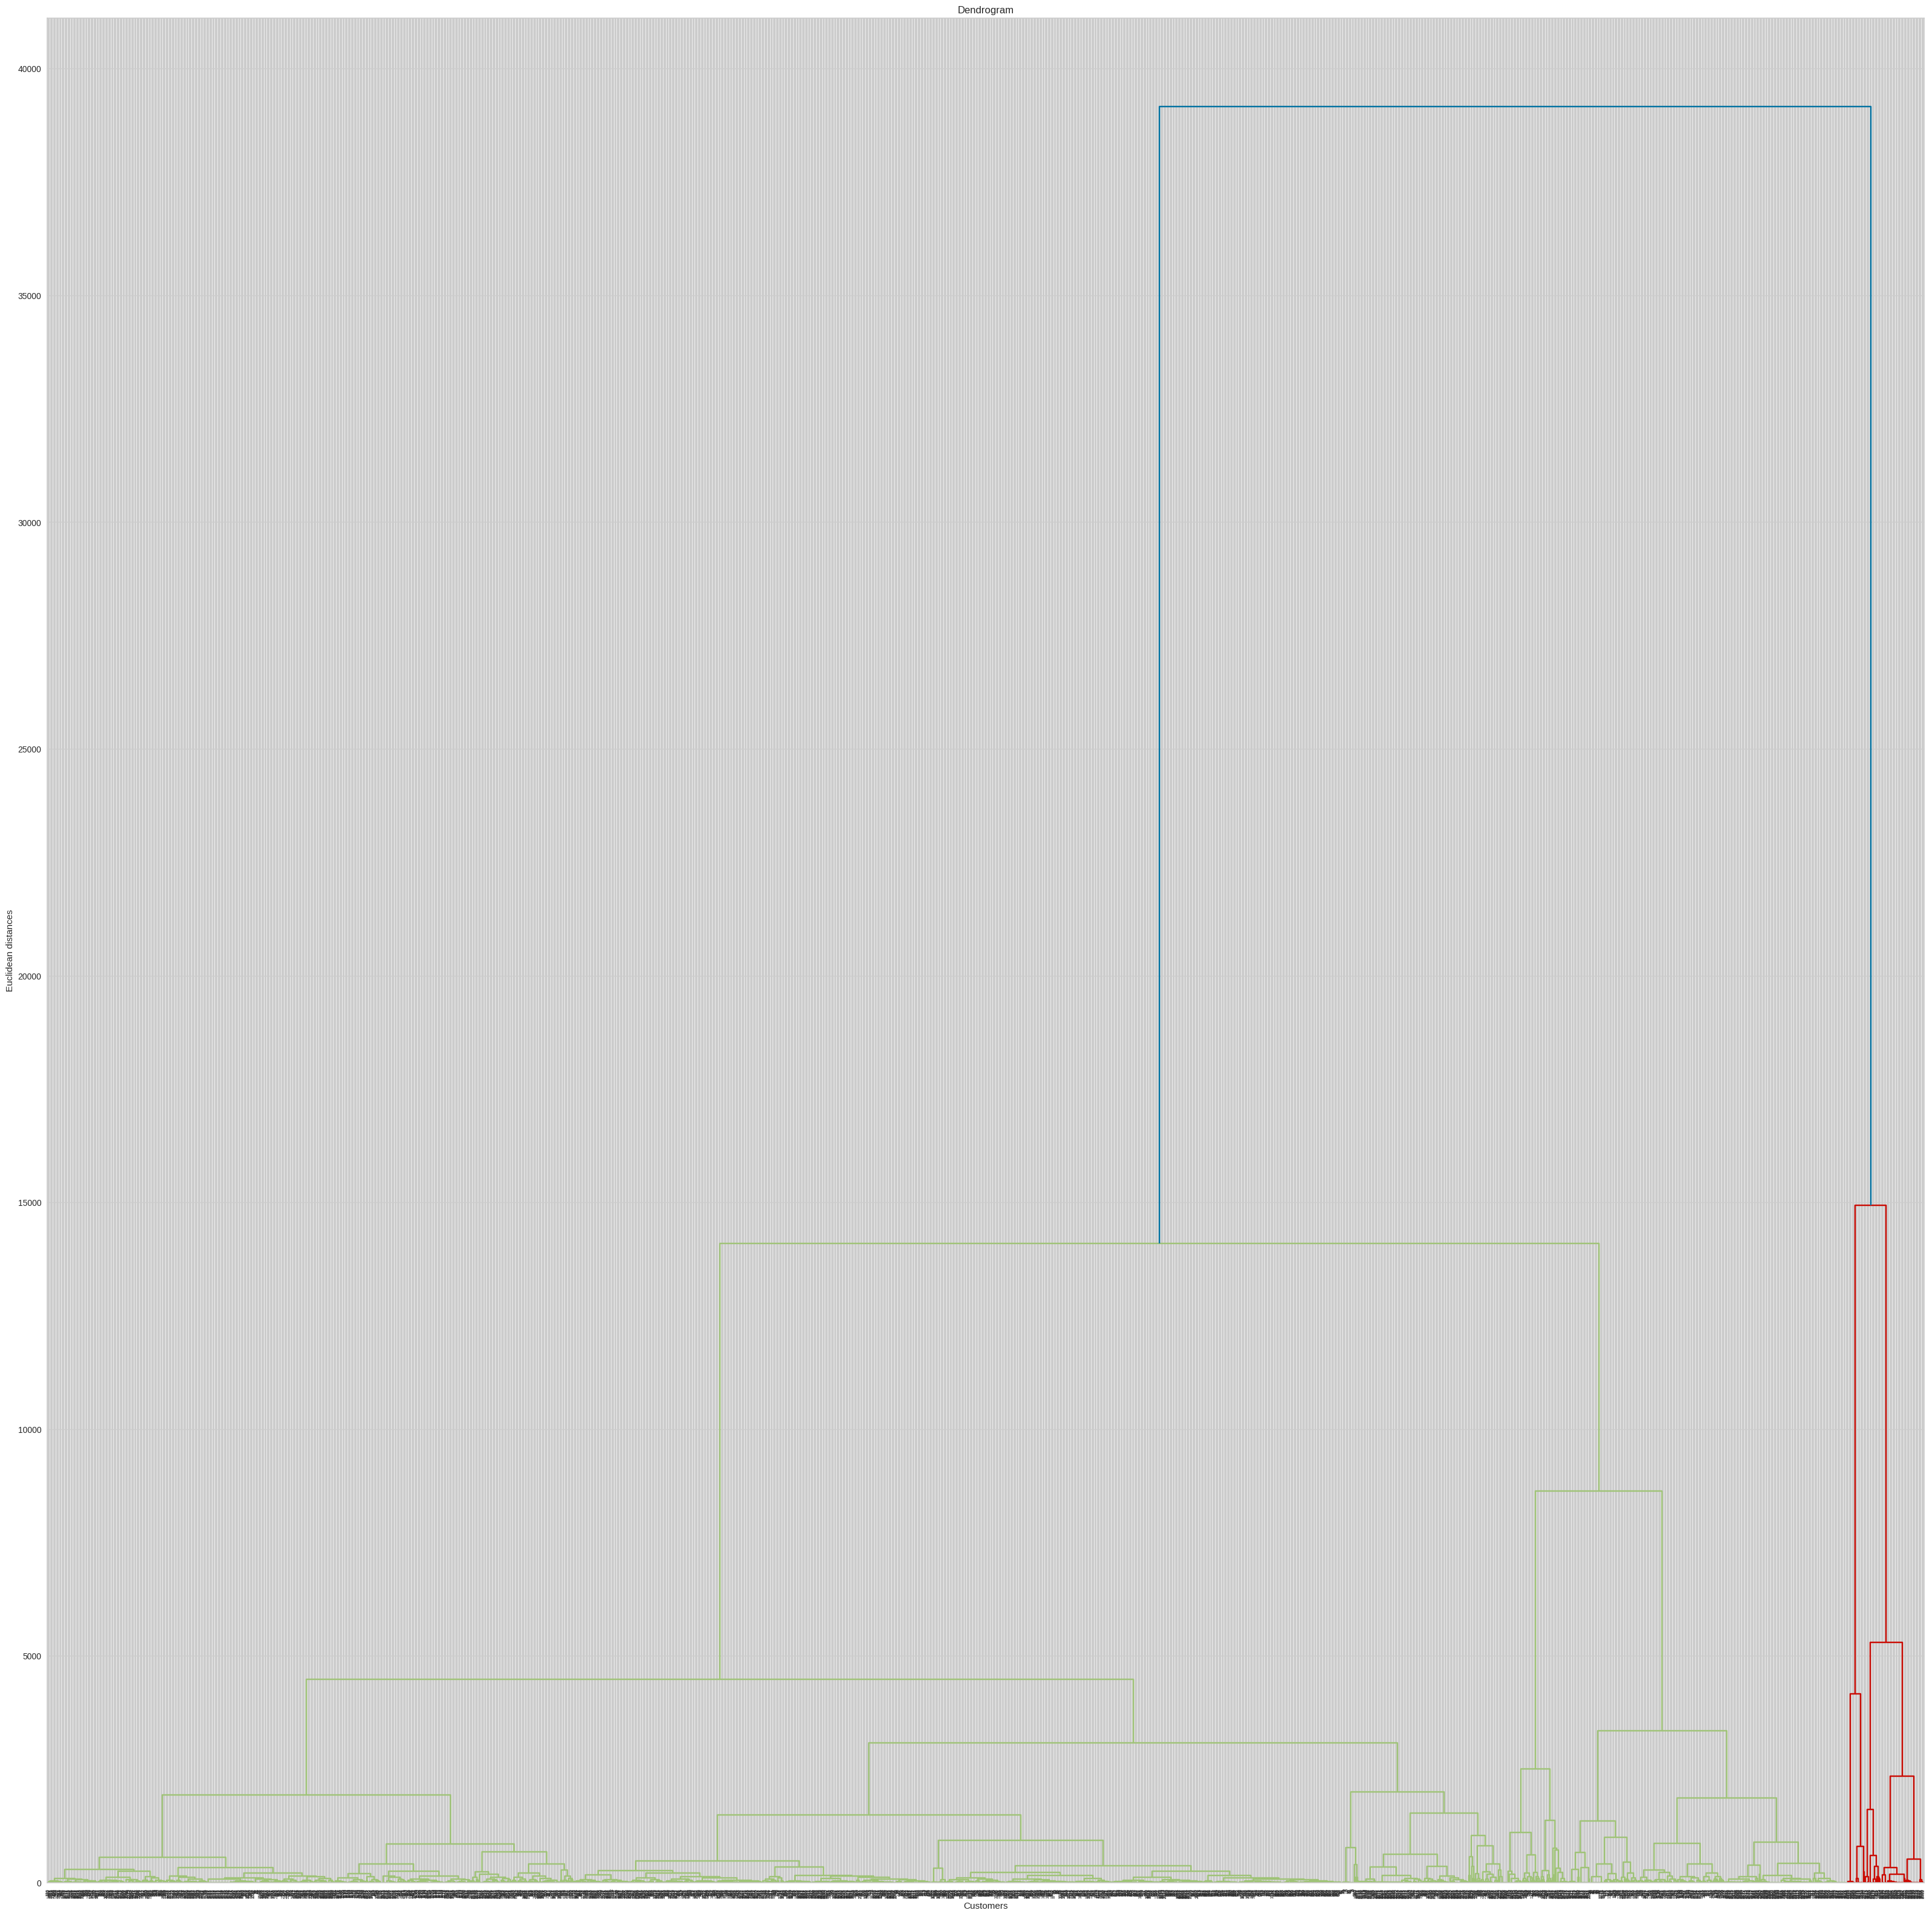

In [6]:
plt.figure(figsize=(40,40))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

---

<center>
    
## Agglomerative Clustering Model

</center>

---

### Find best optimal K value
---
Conclusion: Best Optimal K value woud be between 65 and 80 as concluded with the PCA analysis in the Feature_Engineering notebook.

**Elbow plot**

In [20]:
# List to store the sum of squared distances (inertia) for each K
ssd = []  

# Testing K values from 2 to 70
for k in range(2, 100):  
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X_scaled_agg)
    ssd.append(kmeans.inertia_)

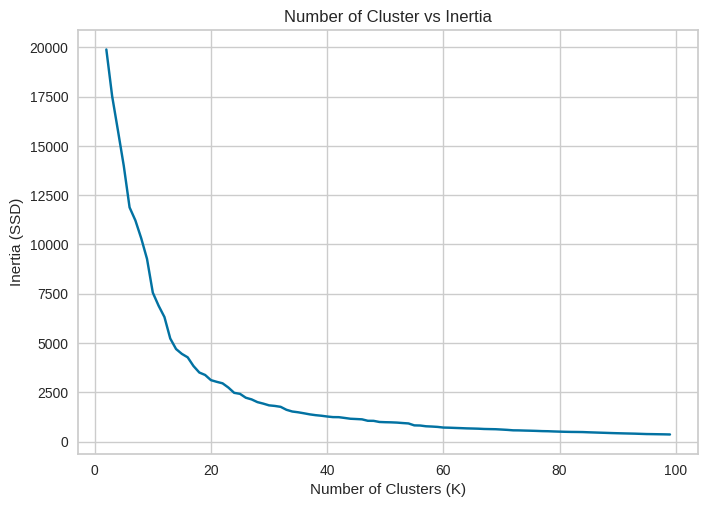

In [21]:
# Plot the elbow graph
plt.plot(range(2, 100), ssd)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSD)')
plt.title('Number of Cluster vs Inertia')
plt.show()

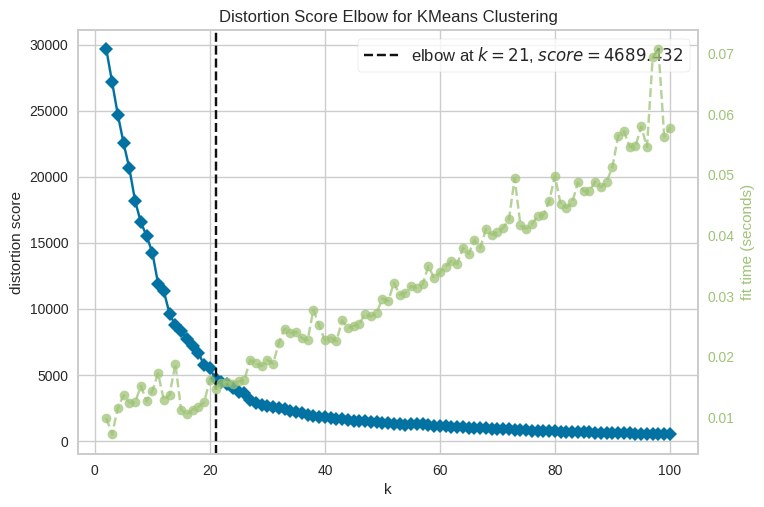

In [58]:
# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(random_state=5), k=100)
Elbow_M.fit(X_scaled_agg)  # fit on PCA transformed data
Elbow_M.show();

**Elbow plot (k from 70 to 100)**

In [10]:
# List to store the sum of squared distances (inertia) for each K
ssd = []  

# Testing K values from 2 to 70
for k in range(70, 120):  
    kmeans = KMeans(n_clusters=k, random_state=5)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

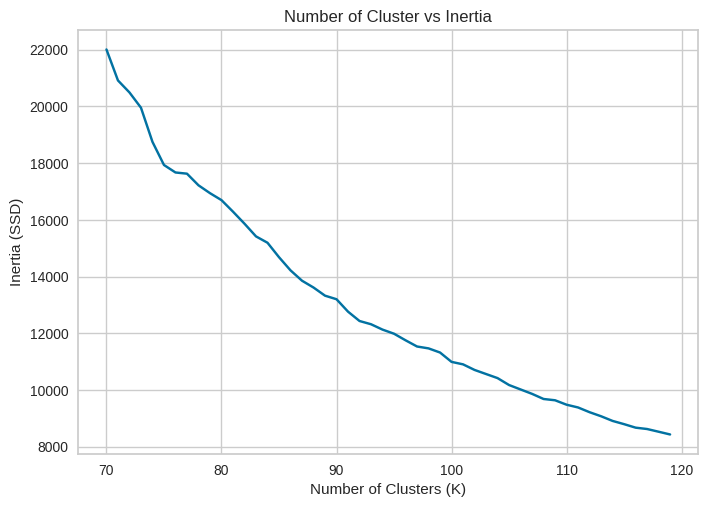

In [11]:
# Plot the elbow graph
plt.plot(range(70, 120), ssd)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSD)')
plt.title('Number of Cluster vs Inertia')
plt.show()

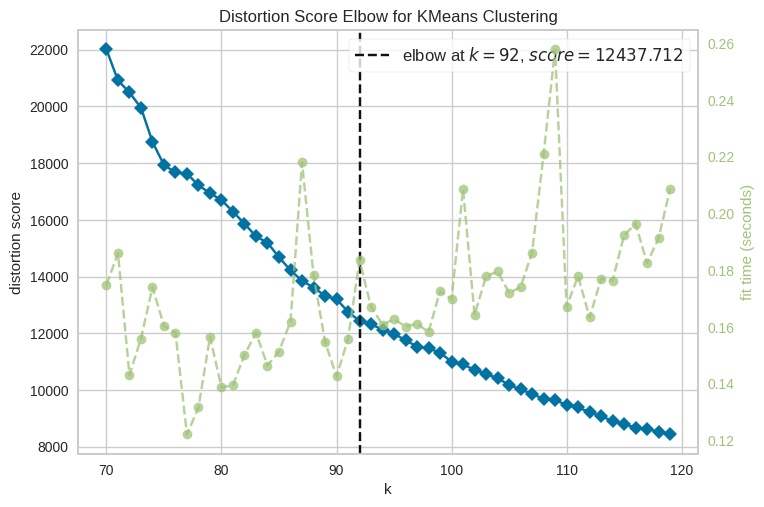

In [12]:
# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(random_state=5), k=(70,120))

Elbow_M.fit(X_scaled)  # fit on PCA transformed data
Elbow_M.show();

---
### Creating a AC model with 60 clusters

---

**Create intance of model**

In [73]:
ac = AgglomerativeClustering(n_clusters= 60, metric='euclidean', linkage='ward')

**Fit the model on the dataset**

In [74]:
ac.fit(X_scaled_agg)

AgglomerativeClustering(n_clusters=60)

In [75]:
nlabels=len(np.unique(ac.labels_))

---
### Evaluate the value K=60 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [76]:
df_o['label'] = ac.labels_

df_o['label_str'] = ac.labels_.astype(str)

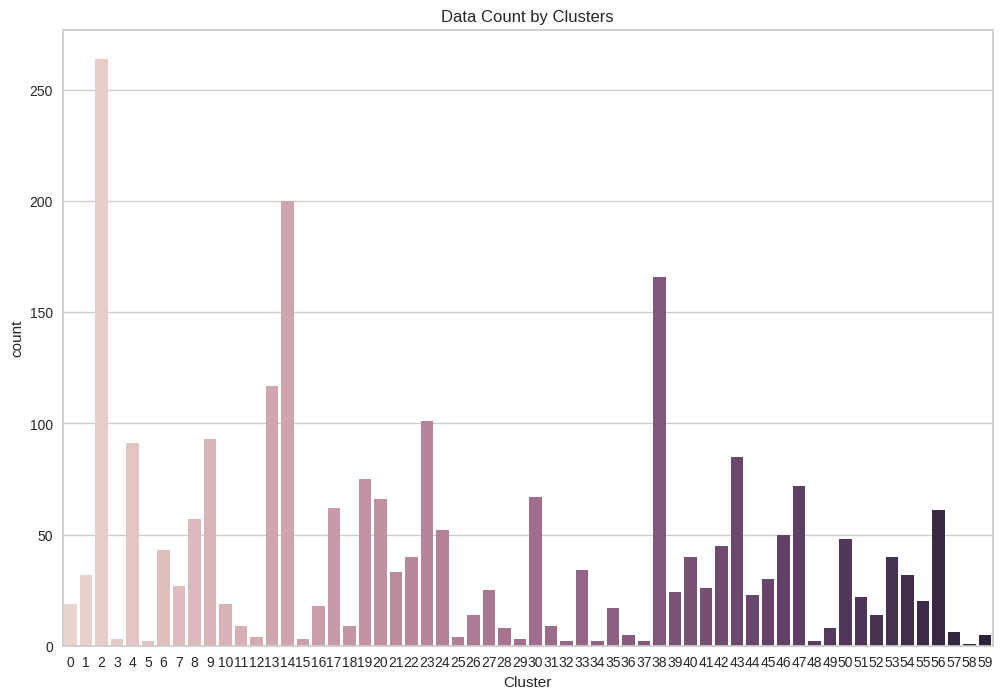

In [77]:
# Create figure and adjust size
plt.figure(figsize=(12,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_2298059/3635699037.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", nlabels)
/tmp/ipykernel_2298059/3635699037.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", nlabels * 5)  # Sample from a wider range


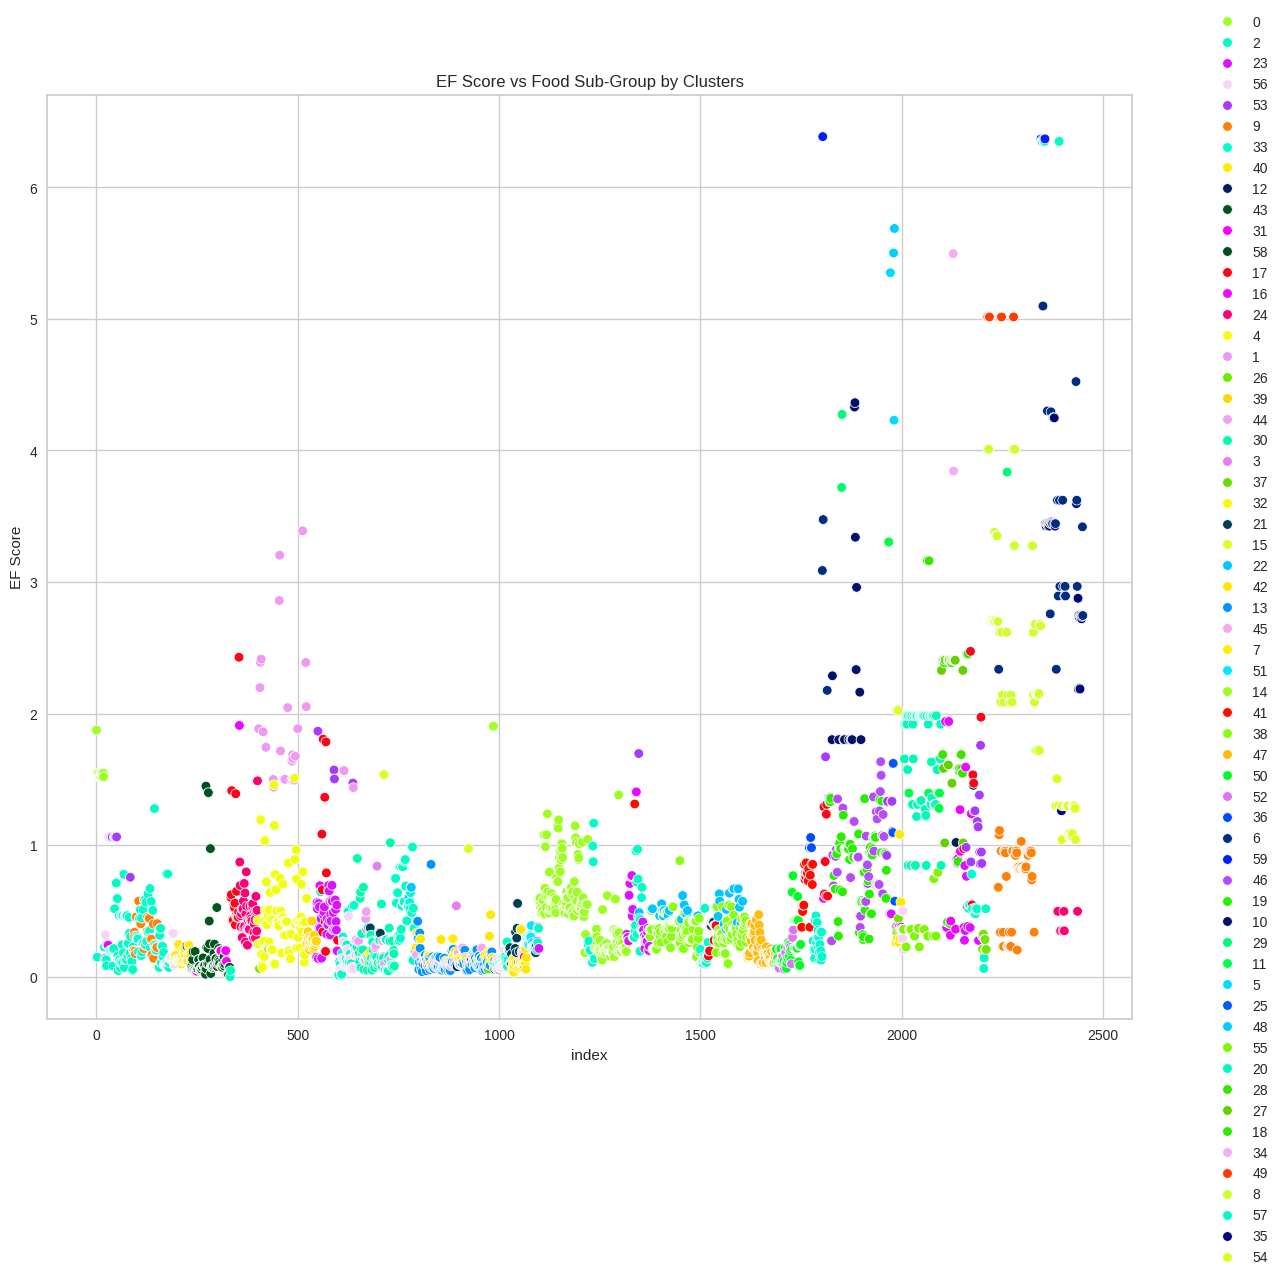

In [78]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", nlabels) 
palette = [cmap(i) for i in range(nlabels)]

cmap = plt.cm.get_cmap("gist_ncar", nlabels * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), nlabels, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_2298059/1518720358.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", nlabels)
/tmp/ipykernel_2298059/1518720358.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", nlabels * 5)  # Sample from a wider range
/tmp/ipykernel_2298059/1518720358.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


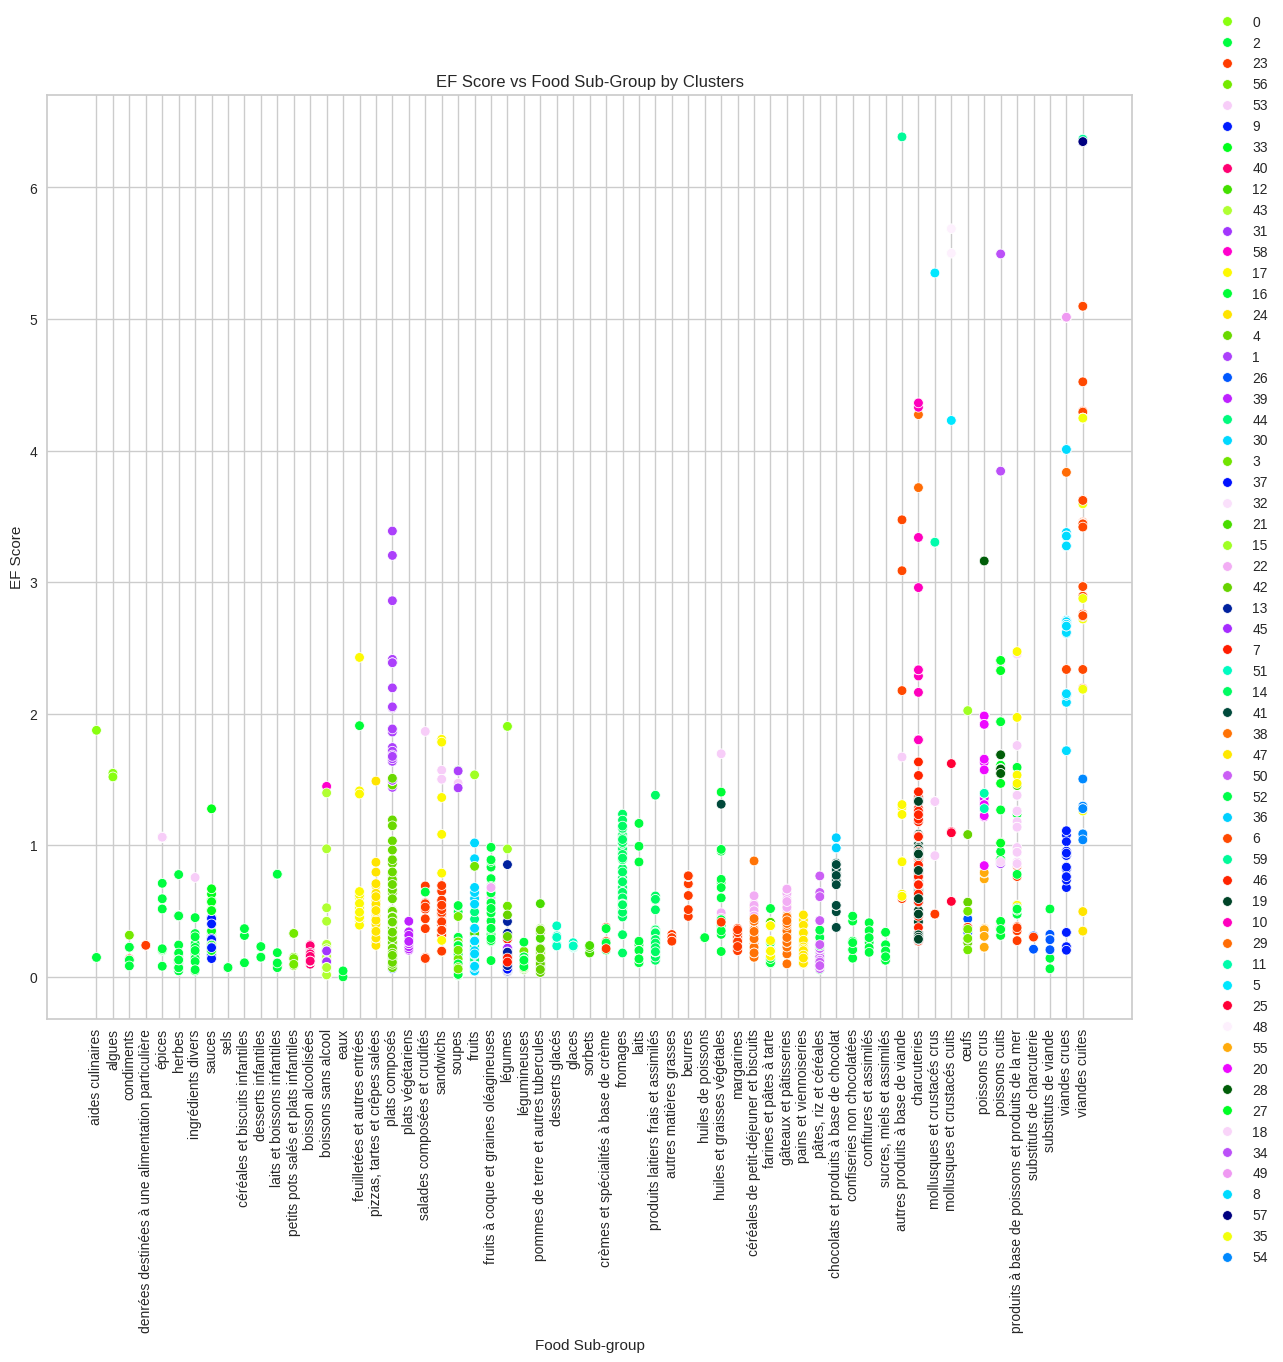

In [79]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", nlabels) 
palette = [cmap(i) for i in range(nlabels)]


cmap = plt.cm.get_cmap("gist_ncar", nlabels * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), nlabels, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---
### Creating an AC model with 80 clusters

---

**Create intance of model**

In [19]:
ac = AgglomerativeClustering(n_clusters= 80, metric='euclidean', linkage='ward')

**Fit the model on the dataset**

In [20]:
ac.fit(X_scaled)

AgglomerativeClustering(n_clusters=80)

---
### Evaluate the value K=80 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [21]:
df_o['label'] = ac.labels_

df_o['label_str'] = ac.labels_.astype(str)

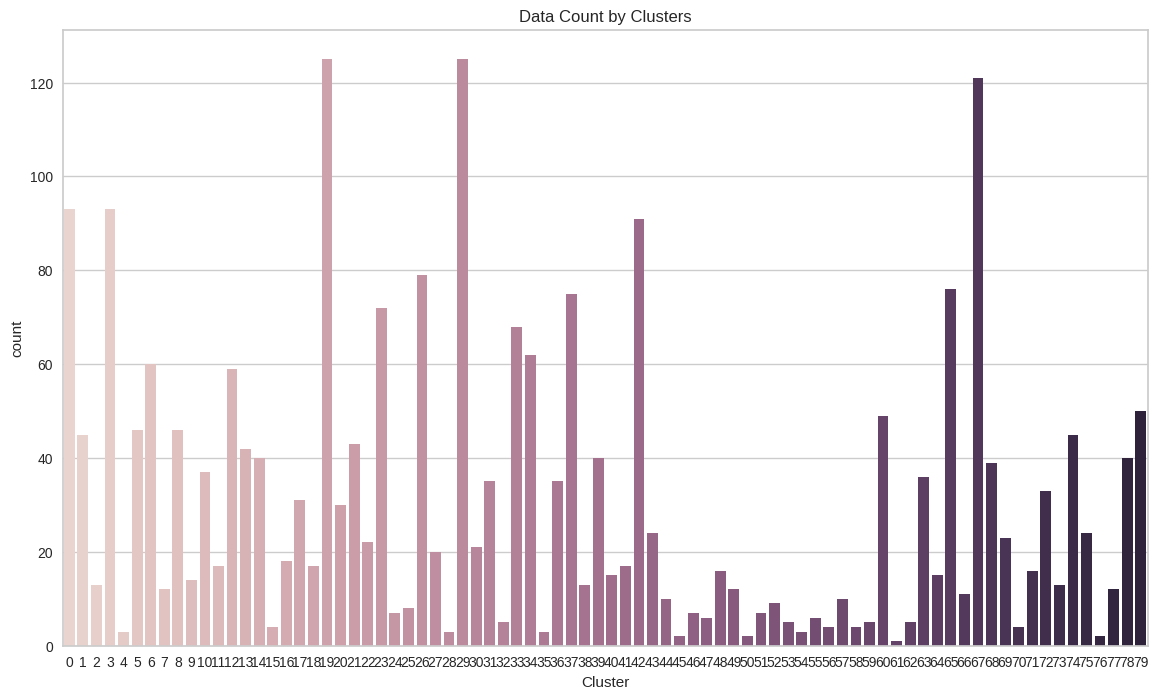

In [22]:
# Create figure and adjust size
plt.figure(figsize=(14,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_2152625/1891239328.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80)
/tmp/ipykernel_2152625/1891239328.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range


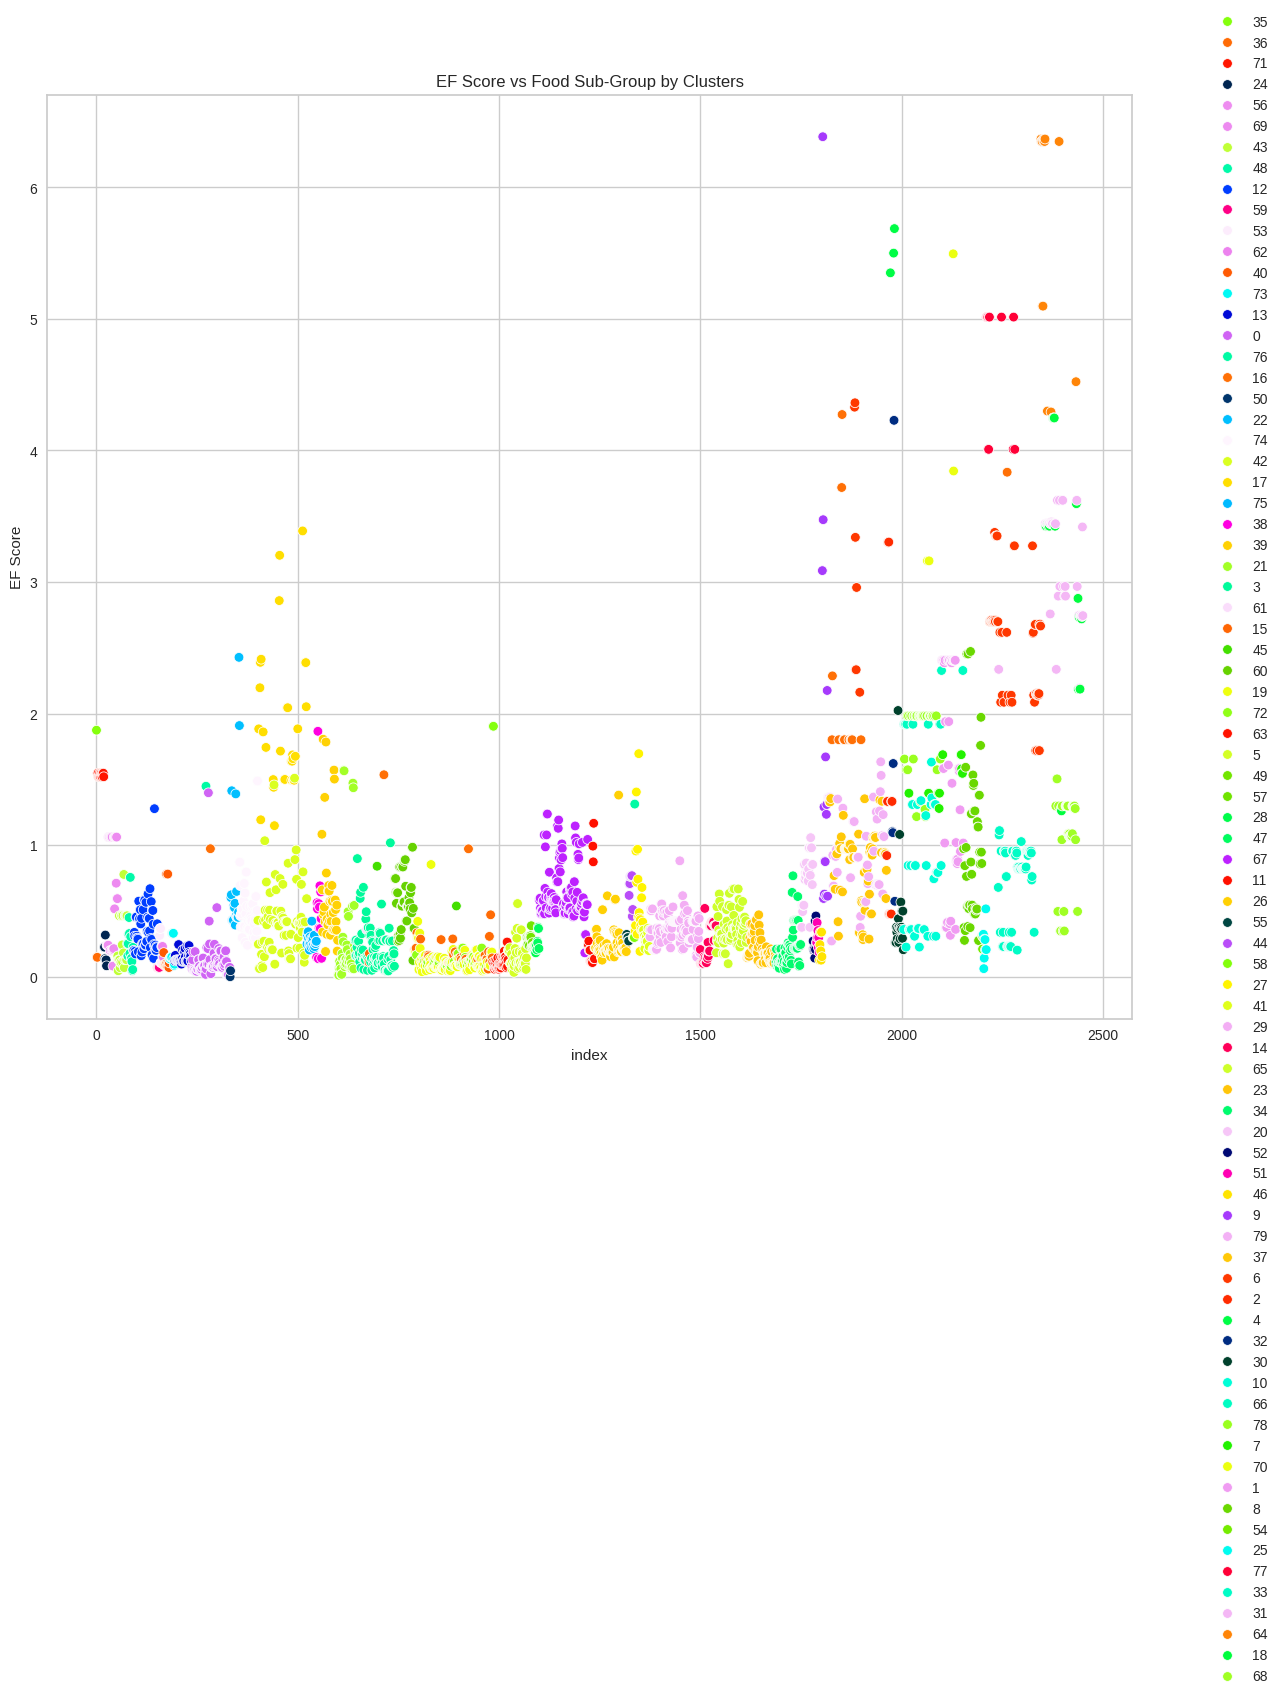

In [23]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 80) 
palette = [cmap(i) for i in range(80)]

cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 80, replace=False) 
palette = [cmap(i) for i in indices]


# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_2152625/183826753.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80)
/tmp/ipykernel_2152625/183826753.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range
/tmp/ipykernel_2152625/183826753.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


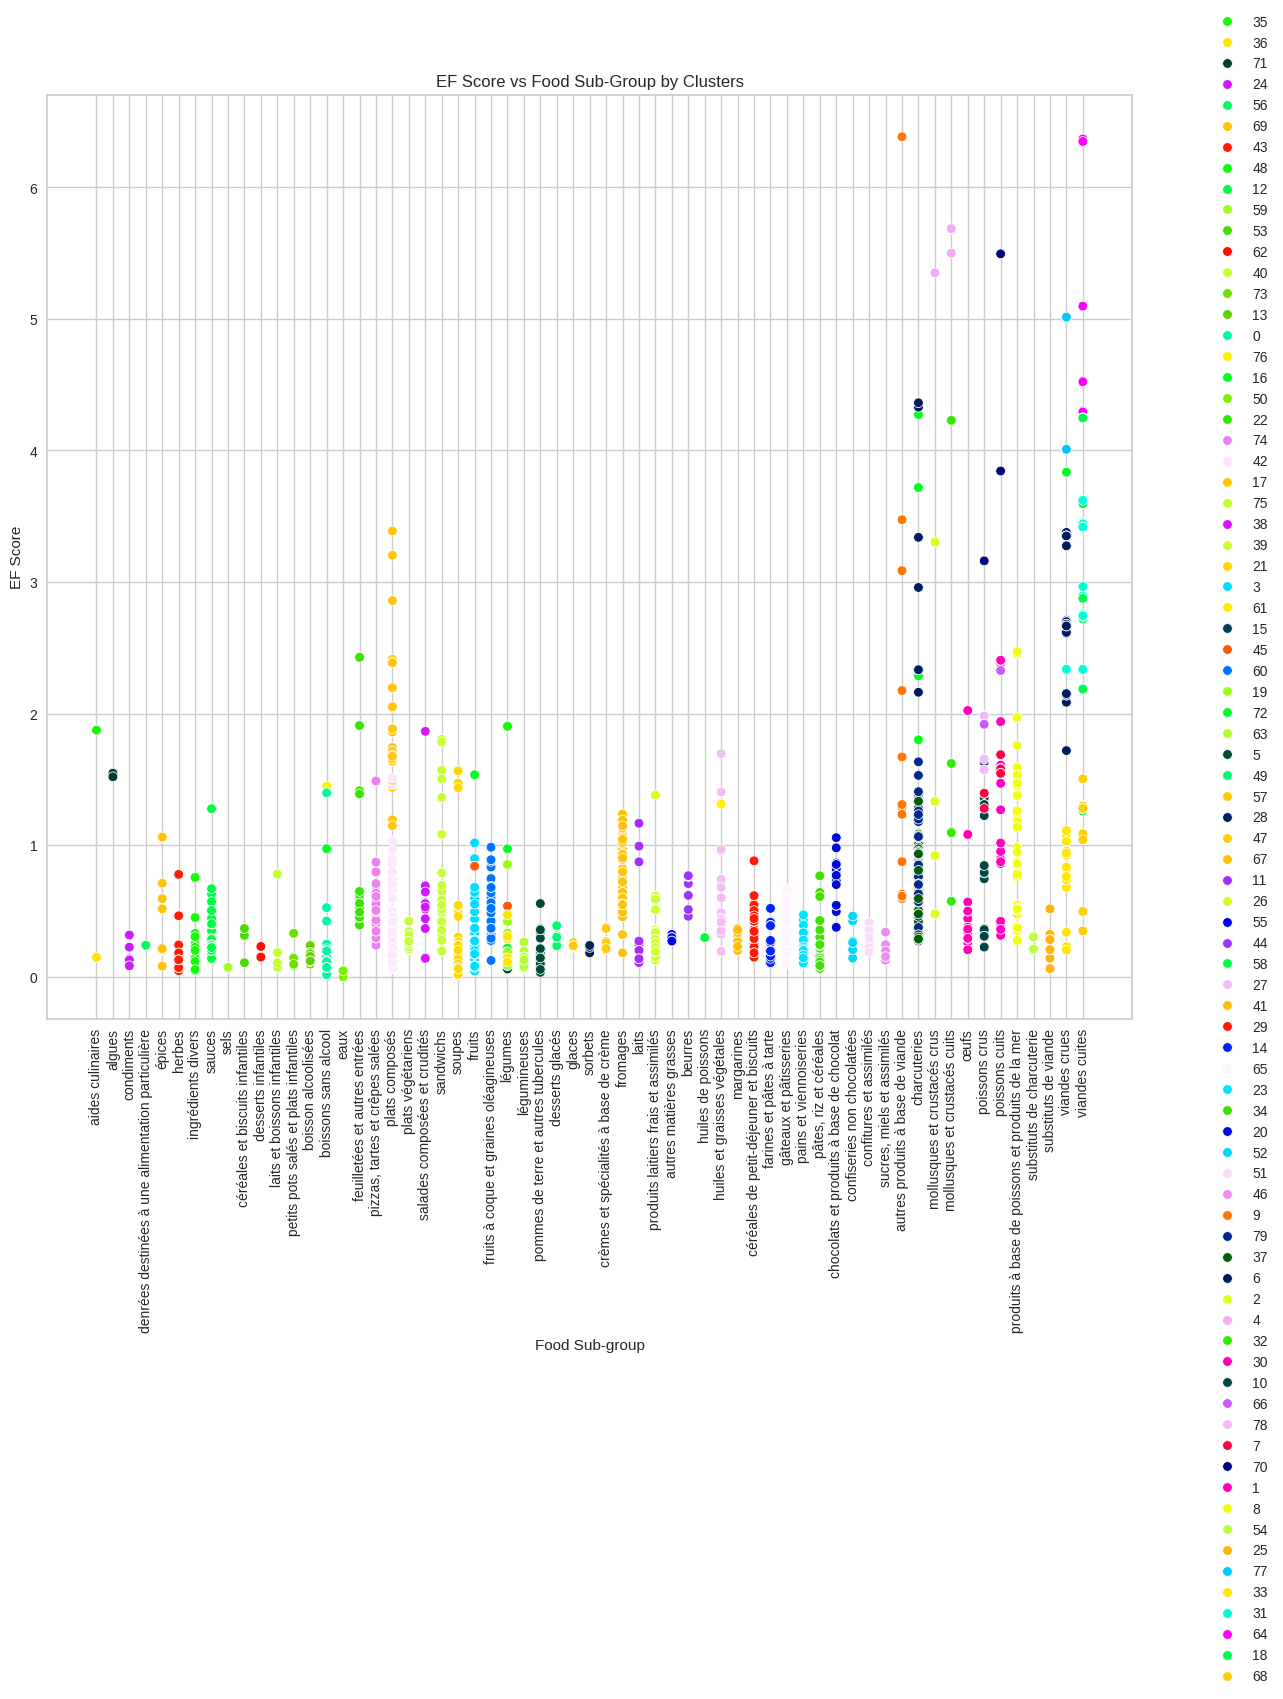

In [24]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 80) 
palette = [cmap(i) for i in range(80)]

cmap = plt.cm.get_cmap("gist_ncar", 80 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 80, replace=False) 
palette = [cmap(i) for i in indices]

# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---
### Creating a KMeans model with 90 clusters

---

**Create intance of model**

In [25]:
ac = AgglomerativeClustering(n_clusters= 90, metric='euclidean', linkage='ward')

**Fit the model on the dataset**

In [26]:
ac.fit(X_scaled)

AgglomerativeClustering(n_clusters=90)

---
### Evaluate the value K=90 for number of cluster

---

**Add Cluster labels to the cleaned dataframe**

In [27]:
df_o['label'] = ac.labels_

df_o['label_str'] = ac.labels_.astype(str)

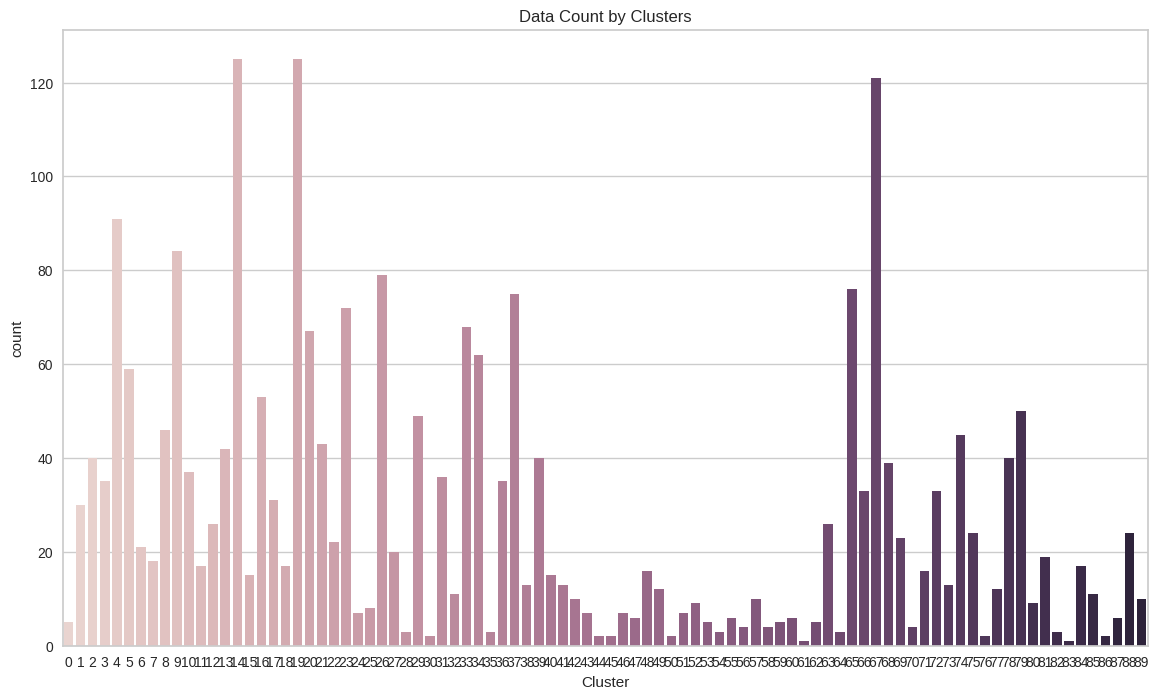

In [28]:
# Create figure and adjust size
plt.figure(figsize=(14,8))

# Create count plot
ax = sns.countplot(x=df_o['label'], hue=df_o['label'], legend=False)

# Add title
ax.set_title('Data Count by Clusters')

# Add axis labels
ax.set_xlabel('Cluster')

# Show plot
plt.show()

/tmp/ipykernel_2152625/1188535821.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90)
/tmp/ipykernel_2152625/1188535821.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range


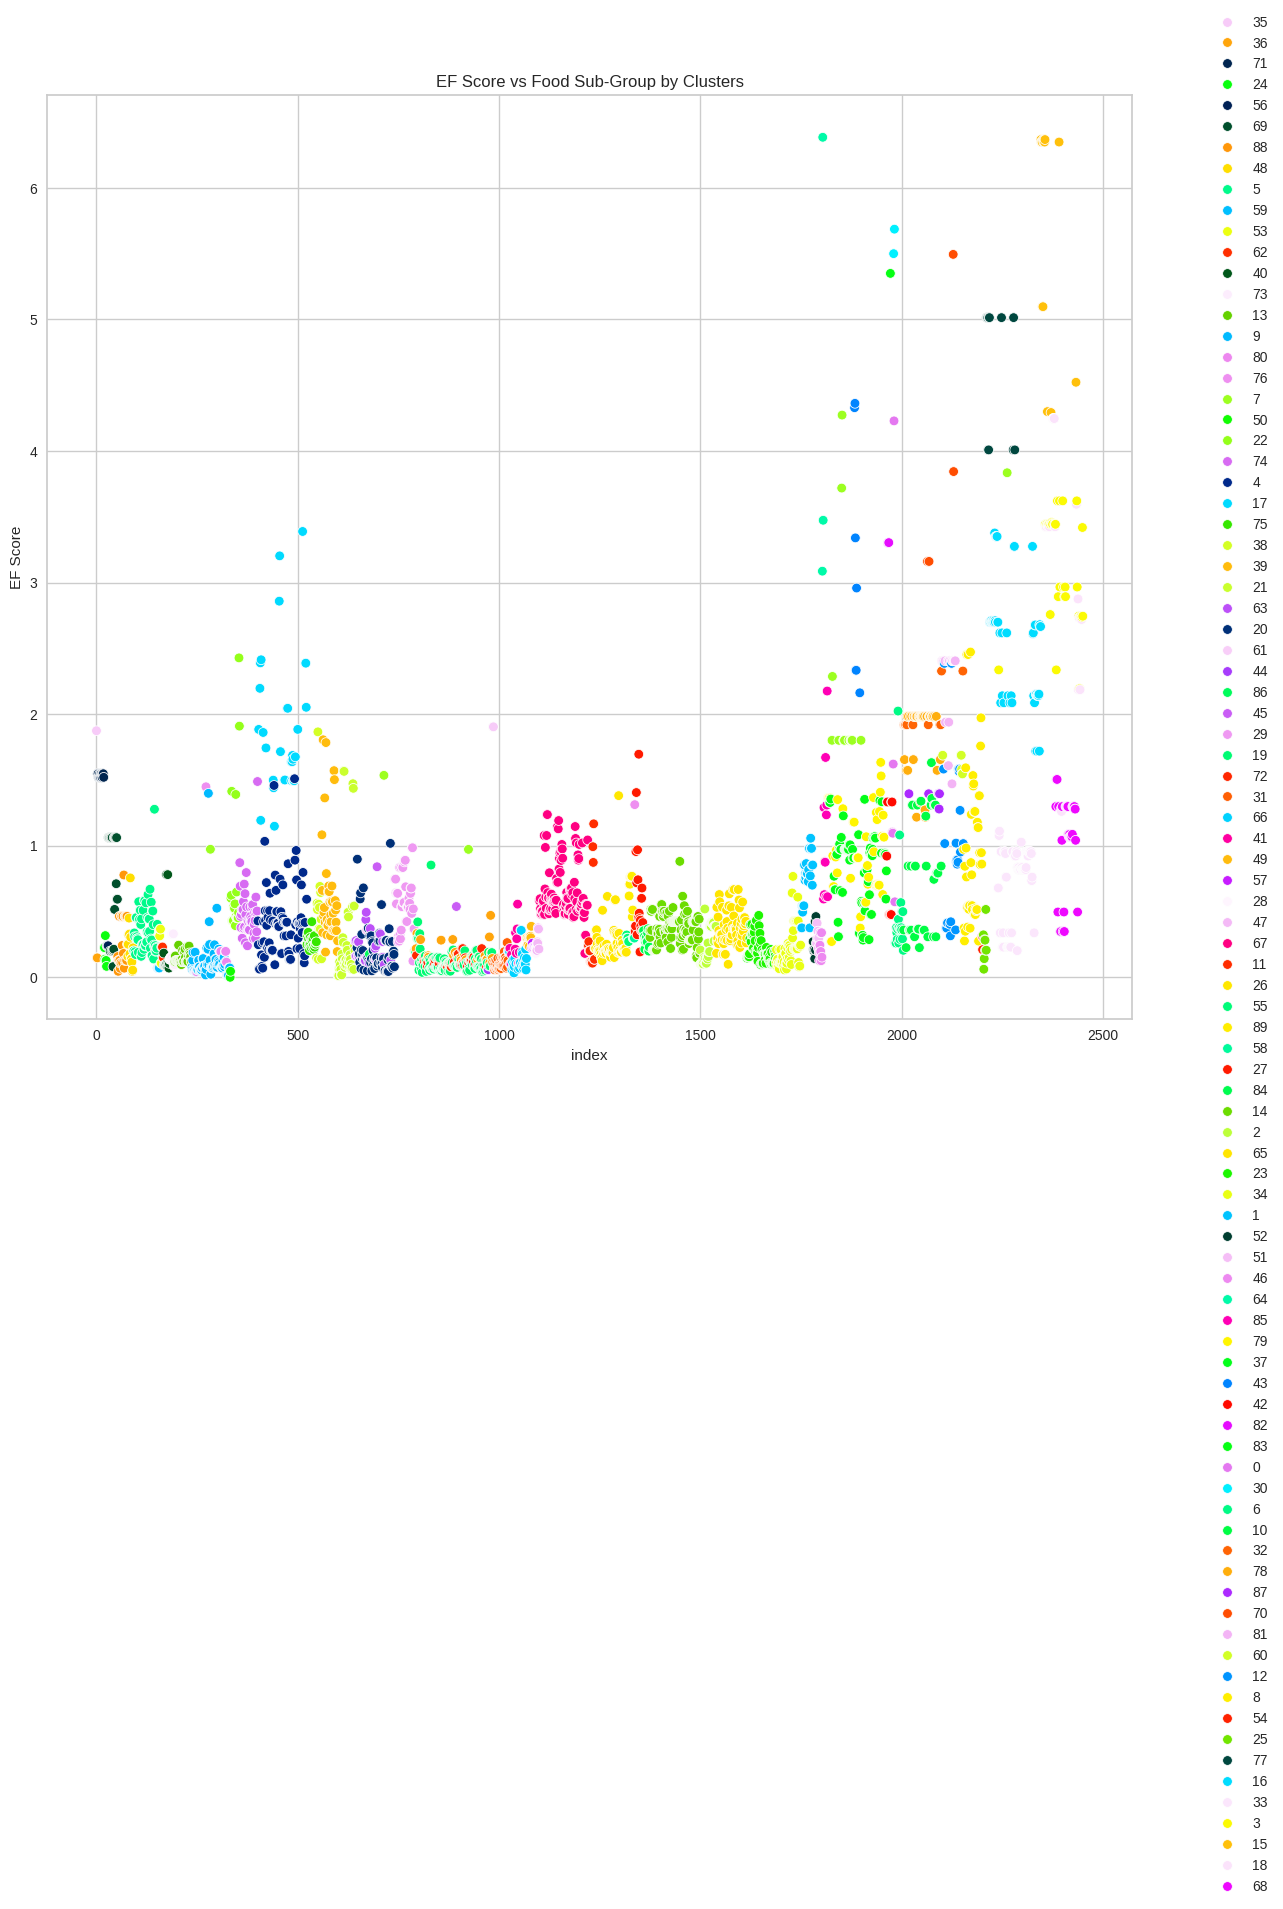

In [29]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 90) 
palette = [cmap(i) for i in range(90)]

cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 90, replace=False) 
palette = [cmap(i) for i in indices]

# Create count plot
ax = sns.scatterplot(df_o, x=df_o.index, y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('index')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


/tmp/ipykernel_2152625/736422139.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90)
/tmp/ipykernel_2152625/736422139.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range
/tmp/ipykernel_2152625/736422139.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)


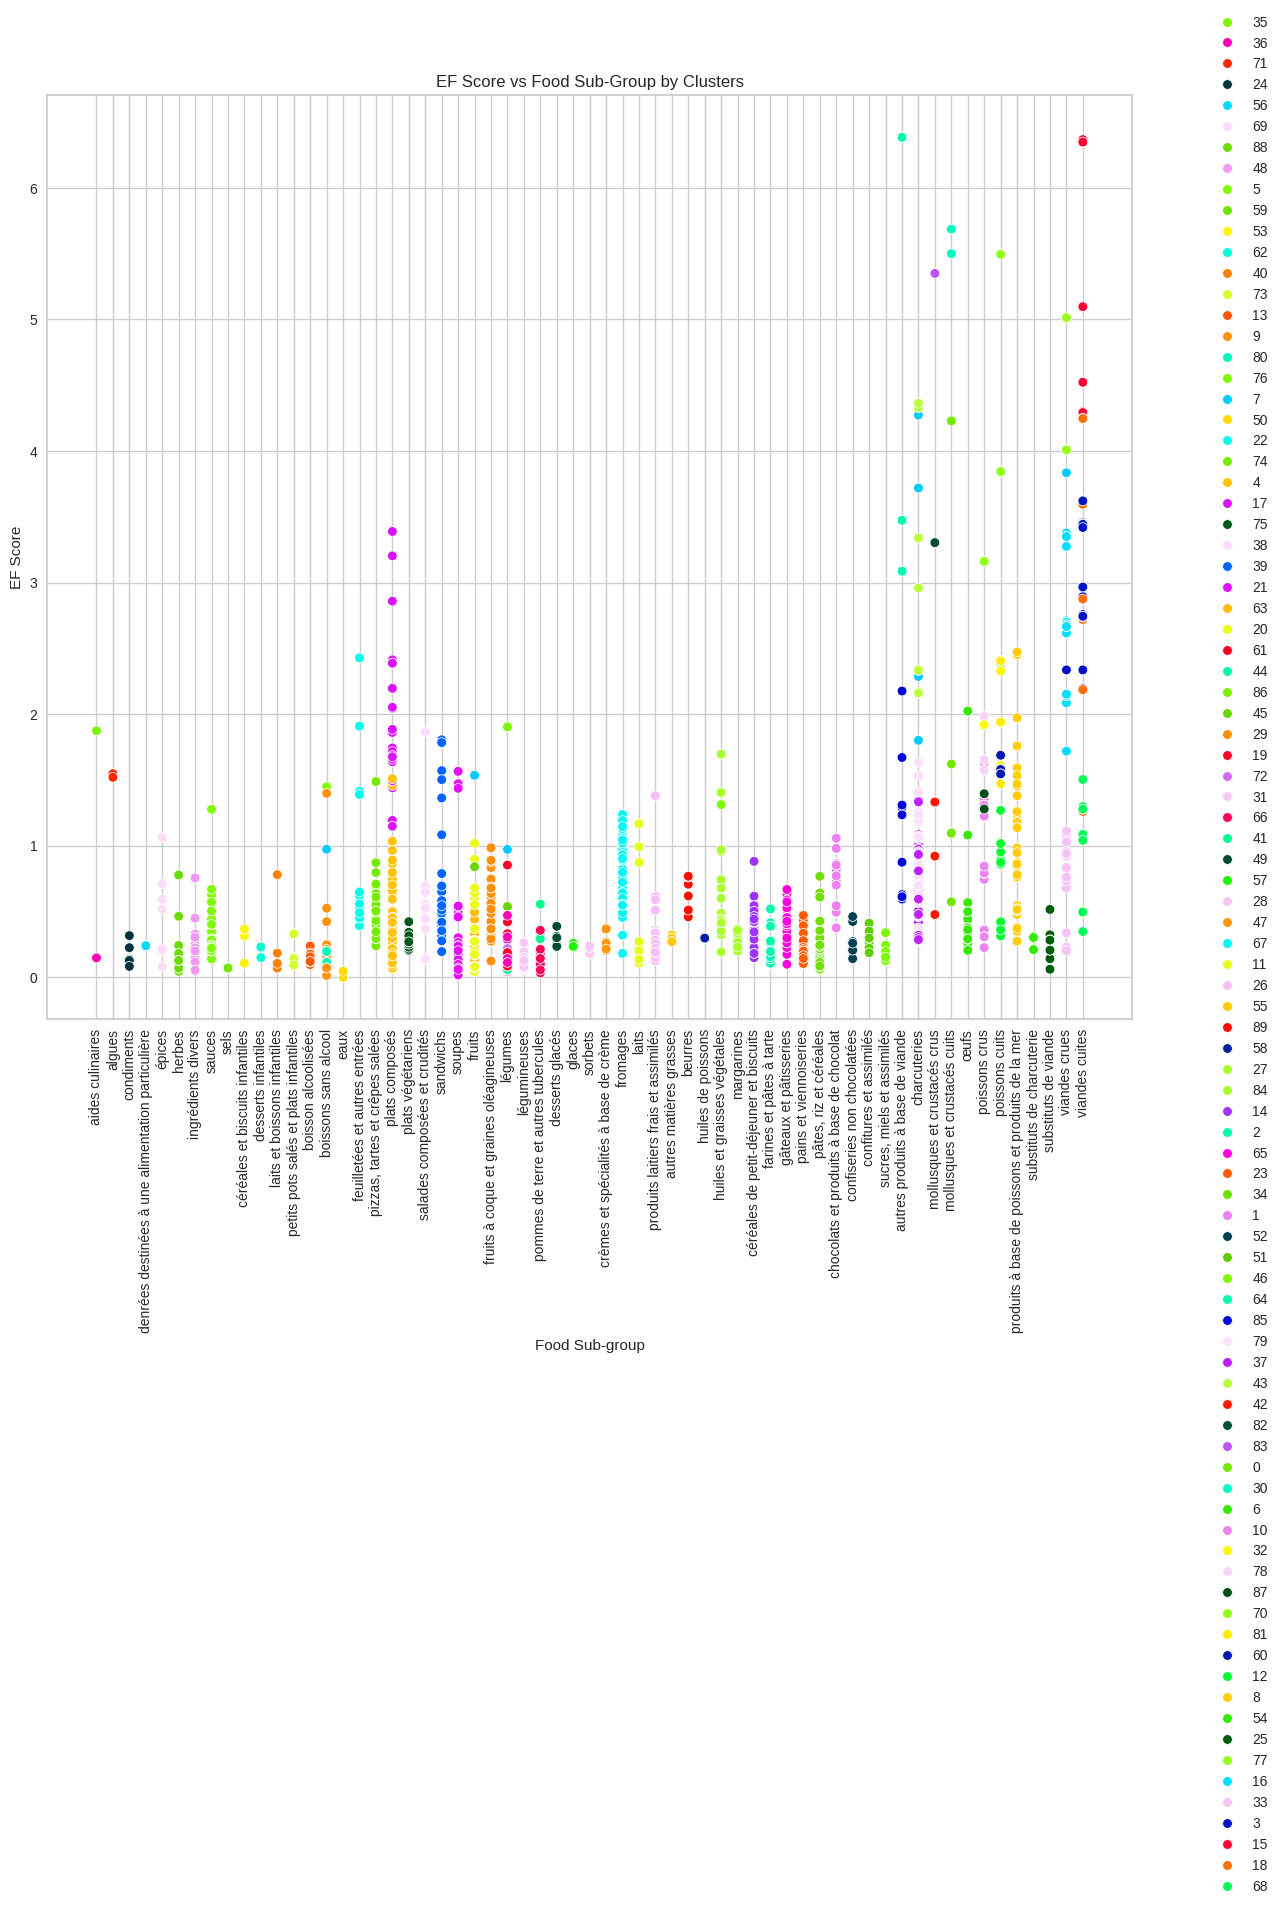

In [30]:
# Create figure and adjust size
plt.figure(figsize=(14,12))

cmap = plt.cm.get_cmap("gist_ncar", 90) 
palette = [cmap(i) for i in range(90)]
cmap = plt.cm.get_cmap("gist_ncar", 90 * 5)  # Sample from a wider range

# Select non-continuous indices to avoid smooth gradients
indices = np.random.choice(range(cmap.N), 90, replace=False) 
palette = [cmap(i) for i in indices]

# Create count plot
ax = sns.scatterplot(df_o, x='Food Sub-group', y='EF Score', hue='label_str', legend=True, palette=palette)

# Add title
ax.set_title(f'EF Score vs Food Sub-Group by Clusters')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df_o['Food Sub-group'].unique(),rotation=90)

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.1), ncol=1)

# Show plot
plt.show()


---
### Get scores for the training dataset
---

**Make prediction on training dataset**

---

<center>
    
## Validation

</center>

---

**Run model on testing dataset**

In [31]:
y_pred_test = grid.predict(X_test_scaled)

NameError: name 'grid' is not defined

**Create Confusion Matrix**

---

<center>
    
## Results

</center>

---

### Results

### Results

all = 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 
            'Internet Service', 
            'Online Security', 'Online Backup', 'Device Protection',
            'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method',
            'Monthly Charges', 'Churn Value',

Training dataset (all+ lat/lon)
| Metric       | Precision | Recall | F1-Score | Support |
|-------------|-----------|-------|----------|--------|
| Class 0     | 0.89     | 0.82  | 0.86    | 4132   |
| Class 1     | 0.60     | 0.72  | 0.66    | 1502   |
| Accuracy    |          |       | 0.80    | 5634   |
| Macro Avg   | 0.74     | 0.77  | 0.76    | 5634   |
| Weighted Avg| 0.81     | 0.80  | 0.80    | 5634   |

test(all + lat/lon)
| Metric       | Precision | Recall | F1-Score | Support |
|-------------|-----------|-------|----------|--------|
| Class 0     | 0.88     | 0.79  | 0.84    | 504    |
| Class 1     | 0.59     | 0.74  | 0.65    | 201    |
| Accuracy    |          |       | 0.78    | 705    |
| Macro Avg   | 0.74     | 0.77  | 0.75    | 705    |
| Weighted Avg| 0.80     | 0.78  | 0.78    | 705    |